# Build makmore MLP

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
words = open('../names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

## Build the dataset

In [ ]:
chars = sorted(set(list(''.join(words))))
stoi = {char:idx+1 for idx,char in enumerate(chars)}
stoi['.'] = 0 
itos = {idx:char for char, idx in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


#|hide
03/23/23 Stop at 10:22 / 1:15:39

In [ ]:
block_size = 3 #characters to take as context before predicting the next

X,Y=[],[]
for w in words[:5]:
    print(w)
    context = [0]*block_size
    for ch in w + '.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context))
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
...
..e
.em
emm
mma
olivia
...
..o
.ol
oli
liv
ivi
via
ava
...
..a
.av
ava
isabella
...
..i
.is
isa
sab
abe
bel
ell
lla
sophia
...
..s
.so
sop
oph
phi
hia


In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [ ]:
# We will embed the 27 characters into 2-d space
C = torch.randn((27,2))

In [ ]:
C[5]

tensor([0.8425, 0.3145])

In [ ]:
#|hide
# Identical to indexing into the embedding table
# directly
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.8425, 0.3145])

In [ ]:
#|hide
C[[5,6,7,7]]

tensor([[ 0.8425,  0.3145],
        [ 0.8930,  1.2062],
        [-1.6647, -1.2650],
        [-1.6647, -1.2650]])

In [ ]:
#|hide
C[torch.tensor([5,6,7,7])]

tensor([[ 0.8425,  0.3145],
        [ 0.8930,  1.2062],
        [-1.6647, -1.2650],
        [-1.6647, -1.2650]])

In [ ]:
#|hide
X.shape

torch.Size([32, 3])

In [ ]:
#|hide
C[X].shape

torch.Size([32, 3, 2])

In [ ]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [ ]:
W1 = torch.randn((6,100)) # 100 neurons each taking 6 inputs
b1 = torch.randn((100)) # the bias for each of the 100 neurons

In [ ]:
#|hide
# pluck out the embeddings for the first character
# in the context
emb[:,0,:].shape

torch.Size([32, 2])

In [ ]:
#|hide
# pluck out the embeddings for the first, second and 
# third character in the context and concatenate them
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]], dim=1).shape

torch.Size([32, 6])

In [ ]:
#|hide
# unbind allows us to get a list of tensors
# equivalent to our manual plucking of embeddings in the
# previous line
len(torch.unbind(emb,1)), len(torch.unbind(emb,1)[0]), torch.unbind(emb,1)[0][0]

(3, 32, tensor([ 0.1410, -0.9693]))

In [ ]:
#|hide
torch.cat(torch.unbind(emb,dim=1), dim=1).shape

torch.Size([32, 6])

In [ ]:
#|hide
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
#|hide
a.shape

torch.Size([18])

In [ ]:
#|hide
# .view is extremely efficient
a.view(2,9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [ ]:
#|hide
a.view(2,3,3)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]])

In [ ]:
#|hide
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [ ]:
#|hide
emb.view((32,6)) == torch.cat(torch.unbind(emb,dim=1), dim=1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [ ]:
#|hide 
h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
h

tensor([[ 0.2321,  0.8842, -0.3949,  ..., -0.9303,  0.9055,  0.9973],
        [ 0.8935,  0.9244,  0.4600,  ..., -0.9758,  0.6007,  0.3516],
        [-0.1606, -0.2722,  0.9683,  ..., -0.9979,  0.9871,  0.5120],
        ...,
        [ 0.5043, -0.9989,  0.3366,  ..., -0.9225, -0.9290, -0.8909],
        [-0.1081, -0.7365,  0.2289,  ...,  0.7690, -0.9949, -1.0000],
        [-0.9999, -0.9561,  0.9999,  ..., -0.9973,  1.0000, -0.9909]])

In [ ]:
#|hide
h.shape

torch.Size([32, 100])

#|hide
03/27/23 Stop at 28:33 / 1:15:39

In [ ]:
W2 = torch.randn((100,27)) # 27 neurons each taking 100 inputs
b2 = torch.randn(27) # the biases for these neurons

In [ ]:
logits = h @ W2 + b2

In [ ]:
#|hide
logits.shape

torch.Size([32, 27])

In [ ]:
#hide
logits

tensor([[ 4.0534e+00,  2.8155e+00,  8.3932e+00, -8.5655e+00, -1.0642e+01,
         -3.7789e+00,  1.1983e+01,  1.4416e+01, -1.7913e+00,  1.0491e+01,
         -3.8777e+00,  6.2393e+00,  1.4216e+01, -6.1704e+00, -1.2285e+00,
          1.7222e+01,  1.3303e+01,  6.6962e+00, -2.1041e+00, -5.3312e+00,
         -2.5310e+00,  1.5954e+01,  7.9101e+00,  2.1804e+01, -9.4494e+00,
         -5.1376e+00, -3.0385e+00],
        [-3.9419e+00, -2.0030e+00,  9.6213e+00, -1.3761e+01, -1.8332e+00,
         -4.9217e+00,  1.1379e+01,  8.4836e+00, -1.1214e+01,  9.1936e+00,
          1.1317e+00,  1.3088e+00,  1.0536e+01, -2.4659e-01,  2.4150e+00,
          3.3822e+00,  2.2016e+00,  7.7727e+00,  9.0946e-01, -4.3787e+00,
         -7.3824e+00,  6.2250e+00,  1.2186e+01,  1.4452e+01, -2.0017e+00,
         -3.0360e+00, -6.6501e+00],
        [-8.2188e-01, -1.7039e+00, -2.0108e+00, -1.1875e+01, -6.8269e+00,
          3.0404e+00,  8.1591e-01,  5.7254e+00,  1.3021e+00,  5.8640e+00,
          6.3562e+00, -4.3840e+00,  8.08

In [ ]:
counts = logits.exp()

In [ ]:
prob = counts/counts.sum(dim=1,keepdim=True)

In [ ]:
#|hide
prob.shape

torch.Size([32, 27])

In [ ]:
#|hide
prob.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [ ]:
#|hide
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
#|hide
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(17.9215)

In [ ]:
#|hide
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)

W1 = torch.randn((6,100), generator=g) # 100 neurons each taking 6 inputs
b1 = torch.randn((100), generator=g) # the bias for each of the 100 neurons

W2 = torch.randn((100,27), generator=g) # 27 neurons each taking 100 inputs
b2 = torch.randn(27, generator=g) # the biases for these neurons

parameters = [C, W1, b1, W2, b2]

In [ ]:
#|hide
sum([p.nelement() for p in parameters])

3481

In [ ]:
#|hide
emb = C[X] #(32,3,2)
h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
logits = h @ W2 + b2
counts = logits.exp()
prob = counts/counts.sum(1,keepdims=True)
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(17.7697)

In [ ]:
#|hide
# This is to be preferred as it is
# numerically more well behaved (uses logsumexp) 
# and
# the forward and backward passes are more efficient
# (uses fused kernels)
F.cross_entropy(logits, Y)

tensor(17.7697)

In [ ]:
#|hide
# large positive logits will get us into
# trouble
logits = torch.tensor([-100,-3,0,100])
counts = logits.exp()
counts

tensor([3.7835e-44, 4.9787e-02, 1.0000e+00,        inf])

In [ ]:
#hide
probs = counts/counts.sum()
probs

tensor([0., 0., 0., nan])

#|hide

Adding or subtracting a constant in these calculations
don't change the result. Hence we can subtract the maximum
of the logits and get an outcome that is numerically stable

In [ ]:
#|hide
logits = torch.tensor([-100,-3,0,100])-100
counts = logits.exp()
probs = counts/counts.sum()
probs

tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])

# Fit the entire dataset 

In [ ]:
block_size = 3 #characters to take as context before predicting the next

X,Y=[],[]
for w in words:
#     print(w)
    context = [0]*block_size
    for ch in w + '.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
#         print(''.join(itos[i] for i in context))
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)

W1 = torch.randn((6,100), generator=g) # 100 neurons each taking 6 inputs
b1 = torch.randn((100), generator=g) # the bias for each of the 100 neurons

W2 = torch.randn((100,27), generator=g) # 27 neurons each taking 100 inputs
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [ ]:
sum([p.nelement() for p in parameters])

3481

In [ ]:
#|hide
torch.randint(0,5,(32,))

tensor([3, 1, 1, 2, 0, 2, 2, 3, 4, 4, 4, 1, 3, 2, 1, 0, 2, 3, 3, 3, 1, 4, 4, 1,
        0, 3, 2, 2, 3, 2, 3, 4])

In [ ]:
#|hide
lre = torch.linspace(-3,1,1000)
lrs = 10**lre
lrs

tensor([1.0000e-03, 1.0093e-03, 1.0186e-03, 1.0280e-03, 1.0376e-03, 1.0472e-03,
        1.0569e-03, 1.0667e-03, 1.0765e-03, 1.0865e-03, 1.0966e-03, 1.1067e-03,
        1.1170e-03, 1.1273e-03, 1.1378e-03, 1.1483e-03, 1.1589e-03, 1.1697e-03,
        1.1805e-03, 1.1915e-03, 1.2025e-03, 1.2136e-03, 1.2249e-03, 1.2362e-03,
        1.2477e-03, 1.2592e-03, 1.2709e-03, 1.2826e-03, 1.2945e-03, 1.3065e-03,
        1.3186e-03, 1.3308e-03, 1.3432e-03, 1.3556e-03, 1.3682e-03, 1.3808e-03,
        1.3936e-03, 1.4065e-03, 1.4196e-03, 1.4327e-03, 1.4460e-03, 1.4594e-03,
        1.4729e-03, 1.4865e-03, 1.5003e-03, 1.5142e-03, 1.5282e-03, 1.5424e-03,
        1.5567e-03, 1.5711e-03, 1.5856e-03, 1.6003e-03, 1.6151e-03, 1.6301e-03,
        1.6452e-03, 1.6604e-03, 1.6758e-03, 1.6913e-03, 1.7070e-03, 1.7228e-03,
        1.7388e-03, 1.7549e-03, 1.7711e-03, 1.7875e-03, 1.8041e-03, 1.8208e-03,
        1.8377e-03, 1.8547e-03, 1.8719e-03, 1.8892e-03, 1.9067e-03, 1.9244e-03,
        1.9422e-03, 1.9602e-03, 1.9783e-

## How to determine a reasonable learning rate

In [ ]:
lrei = []
lossi = []
for i in range(1000):
    #  minibatch construct
    ix = torch.randint(0,X.shape[0],(32,))
    # forward pass
    emb = C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view((-1,6)) @ W1 + b1) #(32,100)
    logits = h @ W2 + b2 #(32,27)
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()  
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
        
    #track stats
    lrei.append(lre[i])
    lossi.append(loss.item())
        
# print(loss.item())        

14.843084335327148
18.17194938659668
19.761276245117188
16.947872161865234
20.661365509033203
21.214704513549805
20.575489044189453
19.512109756469727
23.11766815185547
19.289947509765625
21.353015899658203
21.374975204467773
18.729637145996094
19.664918899536133
19.31208610534668
18.400964736938477
17.705799102783203
20.642879486083984
19.287778854370117
19.309385299682617
20.415990829467773
19.241313934326172
18.72353172302246
20.520008087158203
17.13202476501465
20.809337615966797
16.720359802246094
16.511960983276367
21.289209365844727
17.818912506103516
18.372953414916992
17.23056411743164
17.98614501953125
16.521238327026367
16.15406036376953
20.636716842651367
18.75302505493164
18.87563705444336
15.322574615478516
20.308273315429688
15.709681510925293
18.213708877563477
17.871227264404297
20.920488357543945
18.704132080078125
18.186887741088867
19.4748592376709
19.954336166381836
20.858747482299805
18.145658493041992
18.45526695251465
17.123214721679688
18.752119064331055
15.127

3.772491216659546
2.961885929107666
3.015127420425415
3.595036745071411
4.84480619430542
3.171821117401123
3.268968105316162
3.2056267261505127
3.8361263275146484
3.4657232761383057
2.7785308361053467
3.3364086151123047
3.067646026611328
3.2896111011505127
2.862370014190674
3.5795342922210693
4.341079235076904
4.2643208503723145
3.186988115310669
3.1651713848114014
3.881147861480713
3.3933801651000977
2.8229479789733887
3.7035303115844727
3.3337953090667725
3.1985363960266113
3.36785626411438
3.000974178314209
3.117183208465576
3.1820411682128906
3.2494451999664307
2.9786765575408936
3.0659573078155518
4.541919708251953
4.253470420837402
3.744230270385742
4.472354888916016
3.6881260871887207
3.4274730682373047
4.499106407165527
3.7007970809936523
3.5327584743499756
3.4698448181152344
3.415515422821045
3.7085957527160645
4.0731425285339355
3.5740585327148438
3.152665138244629
3.3257322311401367
3.9189486503601074
3.7924752235412598
2.97833251953125
3.599029541015625
3.460476875305176
3.

#|hide
03/28/23 Stop at 39:39 / 1:15:39

[<matplotlib.lines.Line2D>]

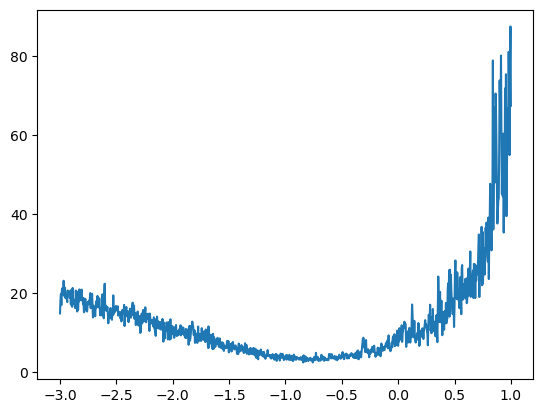

In [ ]:
#|hide
# Use the minimizer here as the starting point
# train until you feel the loss is plateauing
# then decay the learning rate
plt.plot(lrei, lossi)

In [ ]:
block_size = 3 #characters to take as context before predicting the next

X,Y=[],[]
for w in words:
#     print(w)
    context = [0]*block_size
    for ch in w + '.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
#         print(''.join(itos[i] for i in context))
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)

W1 = torch.randn((6,100), generator=g) # 100 neurons each taking 6 inputs
b1 = torch.randn((100), generator=g) # the bias for each of the 100 neurons

W2 = torch.randn((100,27), generator=g) # 27 neurons each taking 100 inputs
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [ ]:
lrei = []
lossi = []
for i in range(10000):
    #  minibatch construct
    ix = torch.randint(0,X.shape[0],(32,))
    # forward pass
    emb = C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view((-1,6)) @ W1 + b1) #(32,100)
    logits = h @ W2 + b2 #(32,27)
    loss = F.cross_entropy(logits, Y[ix])
#     print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()  
    lr = 10**-2 #lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
        
    #track stats
#     lrei.append(lre[i])
#     lossi.append(loss.item())
        
print(loss.item()) 

1.9226114749908447


#|hide
03/28/23 Stop at 52:5s / 1:15:39

In [ ]:
#|hide
# Loss on the entire training set
emb = C[X]
h = torch.tanh(emb.view((-1,6)) @ W1 + b1) #(32,100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
print(loss.item())

2.4845705032348633
